# Visualise Predictions From A Trained Model

THe aim of this notebook is to peek at the predictions of the trained model

In [5]:
import os
import pathlib

if "notebooks" in pathlib.Path.cwd().parts:
  while "notebooks" in pathlib.Path.cwd().parts:
    os.chdir('..')
    print('current directory: ', os.getcwd())

In [6]:
import cv2
import matplotlib.pyplot as plt
from detectron2.data import MetadataCatalog
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import ColorMode, Visualizer

from cell_segmentation.utils.configs import load_config
from cell_segmentation.utils.visualisation import visualise_predictions


def load_model(cfg):
    return DefaultPredictor(cfg)

cfg = load_config(config='experiments/mask_rcnn/configs/inference.yaml')

classes = MetadataCatalog.get("train").set(thing_classes=['shsy5y', 'astro', 'cort'])
predictor = load_model(cfg)


In [7]:
image_path = "data/test/7ae19de7bc2a.png"
image = visualise_predictions(predictor, image_path=image_path, classes=classes)

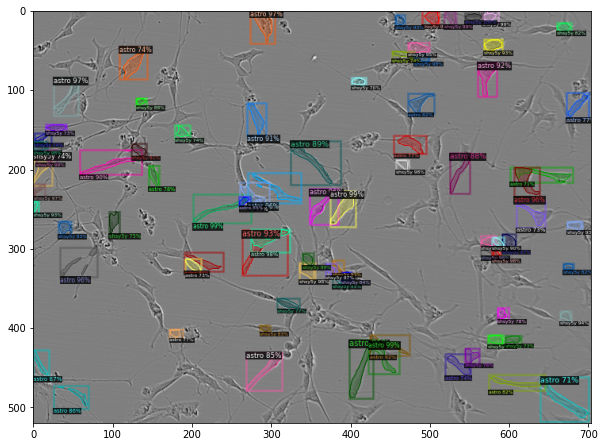

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Visualise Multiple images

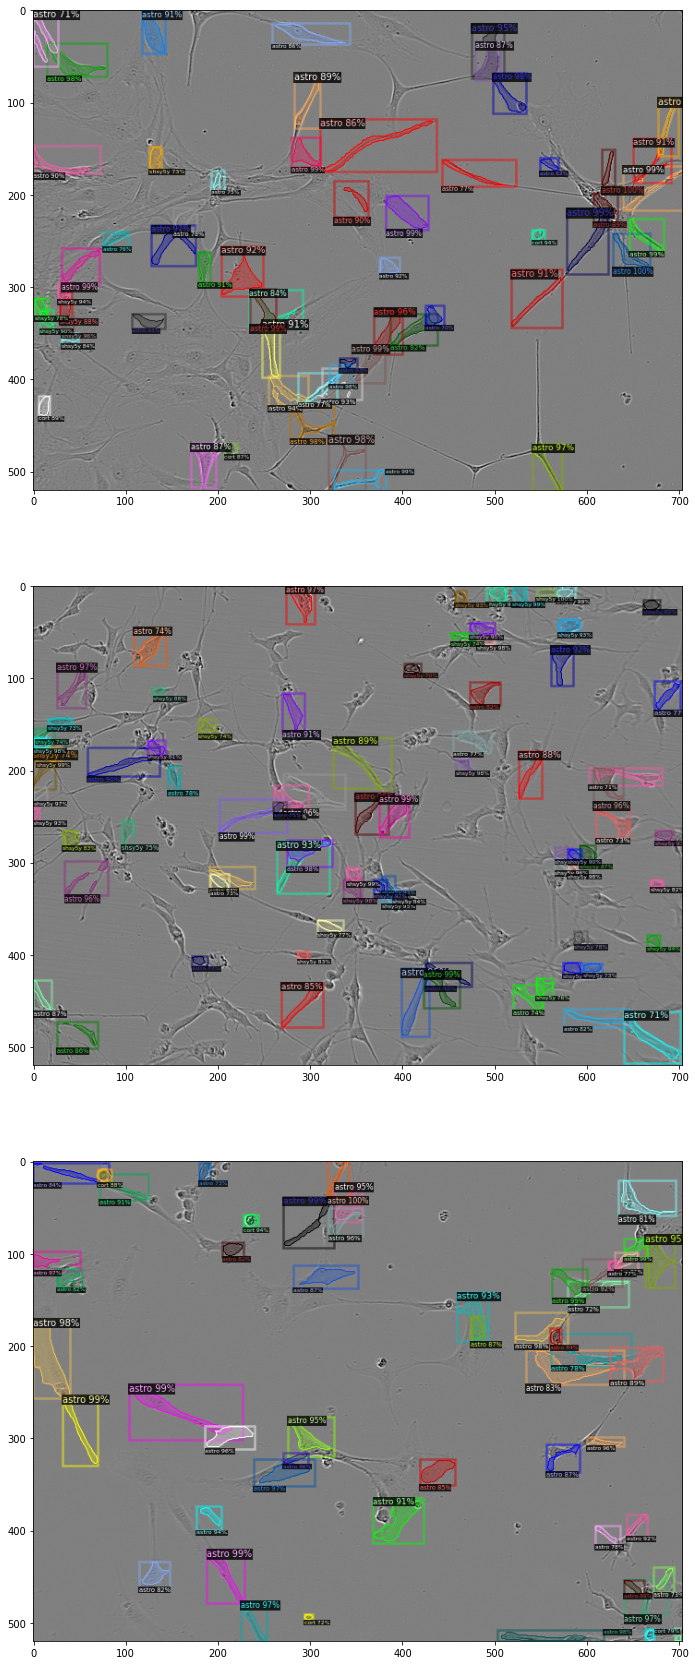

In [12]:
directory = "data/test"
images_path = os.listdir(directory)
fig, ax = plt.subplots(len(images_path), 1, figsize=(30, 30))

indices = [ax[i] for i in range(len(images_path))]

i = 0
for image in images_path:
    im = cv2.imread(os.path.join(directory, image))
    outputs = predictor(im)
    v = Visualizer(
        im[:, :, ::-1],
        metadata=classes,
        scale=1,
        instance_mode=ColorMode.IMAGE_BW,  # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])
    i += 1
